# Predicting Crypto Price using Machine Learning

In this notebook, we will learn how to work with datetime data

## 1. Problem definition
> How well we can predict the future price of a crypto currency such as BTC, ETH,...

## 2. Data

We will use the data downloaded from [Kaggle](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv)

## 3. Evaluation

If we obtain an accuracy more than 0.75. We reach our objective. We will also take a look at RMSLE(Root mean squared log error)

## 4. Features 


In [1]:

# EDA tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Parsing dates
When we worke with time series data, we want to enrich the time and date components as mush as possible. 
We can do this by telling pandas which of our columns has datetime object 

In [2]:
df = pd.read_csv('../data/coin_Bitcoin.csv', low_memory=False, parse_dates=["Date"])

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
df.drop(["SNo", "Name", "Symbol"], axis = 1, inplace = True)

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
df.tail()

,Date,High,Low,Open,Close,Volume,Marketcap
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [7]:
# Do we have missing data ?
df.isna().sum(axis=0)

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

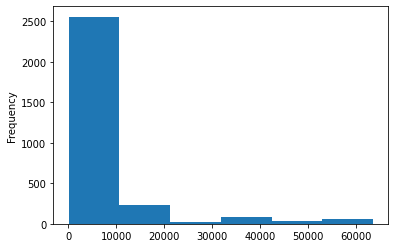

In [8]:
# Do we have outliers ?
df.Close.plot.hist(bins=6)

When working with time series data, it's a good idea to sort it by date

In [9]:
df.sort_values(by=["Date"], inplace=True, ascending=True)

Text(0.5, 1.0, 'Price of BTC')

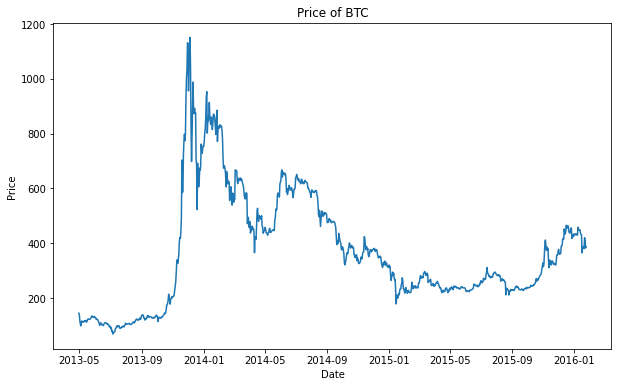

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df.Date[0:1000], df.Close[0:1000])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price of BTC")

## 5. Modeling

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV


Frist we need to predict BTC price in function of datetime

In [12]:
year = df.Date.dt.year
month = df.Date.dt.month
day = df.Date.dt.day


In [13]:
X = pd.DataFrame()
X["Year"] = year
X["Month"] =month
X["Day"] = day
y= df["Close"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [14]:
X_train.tail 

<bound method NDFrame.tail of       Year  Month  Day
2896  2021      4    3
257   2014      1   11
2090  2019      1   18
2679  2020      8   29
944   2015     11   29
...    ...    ...  ...
108   2013      8   15
620   2015      1    9
2075  2019      1    3
1126  2016      5   29
2683  2020      9    2

[2392 rows x 3 columns]>

In [15]:
models = {
    "lg": LinearRegression(),
    "rf": RandomForestRegressor(),
    "svr": SVR(),
}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return (scores)

print(fit_and_score(models, X_train, X_test,y_train, y_test))


{'lg': 0.48689701620546055, 'rf': 0.9974129435317284, 'svr': -0.1564310924472736}


### Hyperparameter turning

In [16]:
np.random.seed(42)
params = {"n_estimators": range(1, 40, 2), "max_depth": [2, 4, 10]}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 10],
                         'n_estimators': range(1, 40, 2)})

In [17]:
model = grid_search.best_estimator_

In [18]:
model.score(X_test, y_test)

0.9971802425185027

In [19]:
test = {'Year': [2022], 'Month': [5], 'Day': [12]}


In [20]:
model.predict(pd.DataFrame(test))


array([53889.64113018])